In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport
import pandas as pd  
import seaborn as sns 

In [3]:
datasets = pd.read_csv('/content/sample_data/mnist_train_small.csv') #read the dataset
datasets 

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
boston = pd.DataFrame(datasets)
boston=boston.drop(columns=['ID'], axis = 1)
boston
    

KeyError: ignored

In [5]:
#profile=ProfileReport(boston)
#profile.to_file(output_file='pandas_profiling_EDA _report.pdf')

In [6]:
boston.isnull().sum()

6        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.586    0
0.587    0
0.588    0
0.589    0
0.590    0
Length: 785, dtype: int64

In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB


In [8]:
boston.describe()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
count,19999.000000,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.0,19999.0
mean,4.470124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000500,0.010801,0.010801,0.000450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012401,0.028451,0.058303,0.065503,0.127556,...,3.714036,2.627231,1.718486,1.020101,0.553228,0.247412,0.097755,0.020751,0.001400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000350,0.010651,0.036052,0.088304,0.112306,0.158508,0.276914,0.406070,0.546827,0.572079,0.696235,0.671684,0.545927,0.366318,0.215011,0.087704,0.036502,0.013651,0.032602,0.006000,0.0,0.0,0.0,0.0
std,2.892807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070712,1.527389,1.527389,0.063641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.233369,1.986589,3.473328,3.100786,5.003077,...,26.815104,22.334578,18.262801,14.000786,10.463422,6.750766,4.079112,1.322117,0.197995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049499,1.095106,2.220820,3.900144,4.749952,5.406774,7.005300,8.719149,10.379141,10.254843,11.457391,11.297264,10.057330,8.255546,6.314821,3.921664,2.712527,0.950818,2.718102,0.600333,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.

In [11]:
Y = boston['MEDV'].values
X1=boston.iloc[:,:-1]
X=boston.iloc[:,:-1].values
X

KeyError: ignored

In [12]:
Y

NameError: ignored

KeyError: ignored

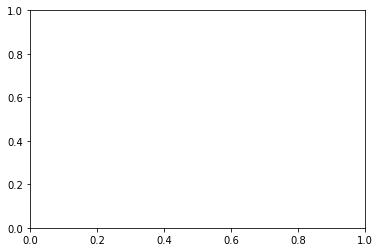

In [13]:
boston.plot.scatter('RM', 'MEDV')

In [ ]:
boston.columns

In [ ]:
sns.pairplot(boston)

In [ ]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
correlation_matrix

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.


Observations:
To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.72) where as LSTAT has a high negative correlation with MEDV(-0.73).
An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.
Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

Observations:
The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
The MEDV tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

In [ ]:
boston.groupby('LSTAT')['MEDV'].mean().plot()
boston.plot(x='LSTAT', y='MEDV', style='o')
plt.title('LSTAT vs MEDV')
plt.xlabel('LSTAT')
plt.ylabel('RM')
plt.show()

In [ ]:
boston.plot.scatter('RM', 'MEDV')

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Y, bins=30)
plt.show()

In [ ]:
# Input Data
# X = features

# Output Data
# Y = MEDV


# splitting data to training and testing dataset.

#from sklearn.cross_validation import train_test_split
#the submodule cross_validation is renamed and reprecated to model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2,
													random_state = 5)

print("xtrain shape : ", X_train.shape)
print("xtest shape : ", X_test.shape)
print("ytrain shape : ", Y_train.shape)
print("ytest shape : ", Y_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
X_train_scaled = scaler.fit_transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [ ]:
# Fitting Multi Linear regression model to training model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train_scaled,Y_train)

# predicting the test set results
Y_pred = regressor.predict(X_test_scaled)

In [ ]:
coefficients = pd.DataFrame(regressor.coef_,X1.columns)
coefficients.columns = ['coefficients']
coefficients

In [ ]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1

In [ ]:
#Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
plt.scatter(Y_test, Y_pred, c = 'green')
plt.xlabel("Actual")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('R2- SCORE:', metrics.r2_score(Y_test,Y_pred))

Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True)

In [ ]:
cv_results = cross_validate(regressor, X, Y, cv=10, scoring = "r2" , return_train_score=True)
cv_results['test_score'].mean(), cv_results['train_score'].mean()

In [ ]:
testdatasets = pd.read_csv('/content/test.csv')
final_test=testdatasets.drop(columns=['ID'], axis = 1).values #read the dataset

In [ ]:
testdatasets 

In [ ]:
final_test_scaled = scaler.transform(final_test)


In [ ]:
final_y_pred_ = regressor.predict(final_test_scaled) # given the features of the test dataset, it will give the final predictions

final_y_pred_

In [ ]:
df = pd.DataFrame({'MEDV Predicted by linear model':final_y_pred_})
df

In [ ]:
output= pd.concat([testdatasets,df],axis=1)
output

In [ ]:
from google.colab import files
#output.to_csv('output.csv') 
#files.download('output.csv')

In [ ]:
#Gradient descent to find the params that minimze the loss function

# beta_init -> parameter
# X -> fts
# y -> target
# ypred ->  matmul of beta_init and X = np.matmul(X,beta)
# loss -> mean(abs(y - y_pred)) = np.mean(np.abs(y - np.matmul(X,beta)))
from scipy.optimize import minimize
import numpy as np
#minimize - given a function, it will try to find the params that makes the function the lowest value


# np.matmul(X,np.square(beta)) = prediceted = x * beta
# mae = mean(abs(predicted - trueVal))
# np.square(beta)

#I am trying to find the value of m (beta) that minimises my below loss function
def objective_function(beta, X, Y): #Loss Function
    #X = np.c_[X,np.ones(X.shape[0])]
    error = np.mean(np.abs(np.matmul(X,np.square(beta)) - Y)) # average of absolute value of (predicted - trueLabel)
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = beta_init = np.ones([13])
# initiate the model with a random value

#code for doing gradient descent
result = minimize(objective_function, beta_init, args=(X_train,Y_train),
                  method='BFGS', options={'maxiter': 500}) #syntax for doing gradient descent

# result
# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x # score = 9.75 * hoursStudies
print(beta_hat)

Customized co efficients here (Y=m^2*x+c) taken as a polynomial regression

In [ ]:
coeff = pd.DataFrame(beta_hat,X1.columns)
coeff.columns = ['coefficients']
coeff